# 1.Creating Model


In [5]:
from keras import layers
from keras.models import Sequential

In [6]:
model = Sequential()

#1. konvolisyon katmanı
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (150,150,3))) 
#1. MaxPooling katmanları
model.add(layers.MaxPooling2D((2,2)))

#2. konvolisyon katmanı
model.add(layers.Conv2D(64,(3,3), activation="relu")) 
#2. MaxPooling katmanları
model.add(layers.MaxPooling2D((2,2)))

#3. konvolisyon katmanı
model.add(layers.Conv2D(128,(3,3), activation="relu")) 
#3. MaxPooling katmanları
model.add(layers.MaxPooling2D((2,2)))

#4. konvolisyon katmanı
model.add(layers.Conv2D(128,(3,3), activation="relu")) 
#4. MaxPooling katmanları
model.add(layers.MaxPooling2D((2,2)))

#Flatten katmanı temel olarak elimizdeki veriyi düzleştirir
model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu")) # 512 çıktı verir
model.add(layers.Dense(1, activation="sigmoid")) #activation sigmoid tek bir sınıfı tetikler

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# 2.Compiling Model

In [8]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ["acc"])

# 3.Data Generation

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (rescale= 1./255)
validation_datagen = ImageDataGenerator (rescale= 1./255)

In [10]:
train_directory = "Dataset/catdog/train"
validation_directory = "Dataset/catdog/validation"

In [11]:
# target size = 1. hücre imput size,class mode ise class sayısı belirtir
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary")

validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 4.Training

In [12]:
history = model.fit_generator(train_generator,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50)

C:\Users\Kurtulus-pc\AppData\Local\Temp\ipykernel_7448\3846436660.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 54s 522ms/step - loss: 0.6848 - acc: 0.5433 - val_loss: 0.6631 - val_acc: 0.5900
Epoch 2/20
100/100 [==============================] - 34s 339ms/step - loss: 0.6543 - acc: 0.6103 - val_loss: 0.6323 - val_acc: 0.6450
Epoch 3/20
100/100 [==============================] - 33s 333ms/step - loss: 0.5982 - acc: 0.6833 - val_loss: 0.5963 - val_acc: 0.6790
Epoch 4/20
100/100 [==============================] - 33s 331ms/step - loss: 0.5541 - acc: 0.7204 - val_loss: 0.5839 - val_acc: 0.6910
Epoch 5/20
100/100 [==============================] - 34s 335ms/step - loss: 0.5366 - acc: 0.7264 - val_loss: 0.5967 - val_acc: 0.6820
Epoch 6/20
100/100 [==============================] - 33s 331ms/step - loss: 0.5104 - acc: 0.7489 - val_loss: 0.5853 - val_acc: 0.6960
Epoch 7/20
100/100 [==============================] - 33s 333ms/step - loss: 0.4957 - acc: 0.7569 - val_loss: 0.5563 - val_acc: 0.7040
Epoch 8/20
100/100 [==============================] - 3

# 5.Visualization

C:\Users\Kurtulus-pc\AppData\Local\Temp\ipykernel_7448\3773659253.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid") #arka temayı ayarlamak görselleştirme


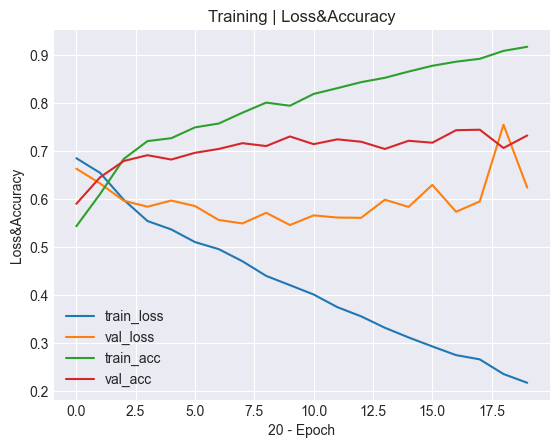

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-darkgrid") #arka temayı ayarlamak görselleştirme
plt.figure()

#grafik çizimi
epochs=20
plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history.history["val_acc"], label="val_acc")

plt.title("Training | Loss&Accuracy")
plt.xlabel("20 - Epoch")
plt.ylabel("Loss&Accuracy")
plt.legend(loc="lower left")

In [30]:
model.save("models/cat_dog_first.h5")

Problem:OVERFITTING
--------------------
val_loss ile training_loss arasında çok fark varsa modelin bilmediği bir görüntü geldiğinde aşırı uydurma overfiting yapar

1. New Model
2. Data Augmentation

# Creating New Model

1. Dropout katmanı ekliyoruz -> nöronlar arasındaki bağları rastgele koparıp
bağlayarak modeli iyileştirmeyi dener

In [18]:
model_x = Sequential()

#1. konvolisyon katmanı
model_x.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (150,150,3))) 
#1. MaxPooling katmanları
model_x.add(layers.MaxPooling2D((2,2)))

#2. konvolisyon katmanı
model_x.add(layers.Conv2D(64,(3,3), activation="relu")) 
#2. MaxPooling katmanları
model_x.add(layers.MaxPooling2D((2,2)))

#3. konvolisyon katmanı
model_x.add(layers.Conv2D(128,(3,3), activation="relu")) 
#3. MaxPooling katmanları
model_x.add(layers.MaxPooling2D((2,2)))

#4. konvolisyon katmanı
model_x.add(layers.Conv2D(128,(3,3), activation="relu")) 
#4. MaxPooling katmanları
model_x.add(layers.MaxPooling2D((2,2)))

#Flatten katmanı temel olarak elimizdeki veriyi düzleştirir
model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))

model_x.add(layers.Dense(512, activation="relu")) # 512 çıktı verir
model_x.add(layers.Dense(1, activation="sigmoid")) #activation sigmoid tek bir sınıfı tetikler

model_x.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [19]:
model_x.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ["acc"])

# Image Data Agumantation


In [24]:
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 45,
                                       width_shift_range =0.3,
                                       height_shift_range =0.3,
                                       shear_range = 0.3,
                                       zoom_range = 0.3,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       fill_mode = "nearest")
validation_datagen_x= ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory,
                                                        target_size = (150,150),
                                                        batch_size = 16,
                                                        class_mode = "binary")
validation_generator_x = validation_datagen_x.flow_from_directory(train_directory,
                                                                    target_size = (150,150),
                                                                    batch_size = 16,
                                                                    class_mode = "binary")

NameError: name 'train_datagen_x' is not defined

# Training New Model

In [27]:
history_x = model_x.fit_generator(train_generator_x,
                                steps_per_epoch = 100,
                                epochs = 100,
                                validation_data = validation_generator_x,
                                validation_steps = 50)
print("Info: Done!")

Epoch 1/100


C:\Users\Kurtulus-pc\AppData\Local\Temp\ipykernel_7448\2036634847.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_x = model_x.fit_generator(train_generator_x,


100/100 [==============================] - 30s 300ms/step - loss: 0.6694 - acc: 0.5831 - val_loss: 0.6736 - val_acc: 0.5487
Epoch 2/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6667 - acc: 0.5860 - val_loss: 0.6653 - val_acc: 0.5738
Epoch 3/100
100/100 [==============================] - 30s 301ms/step - loss: 0.6582 - acc: 0.5966 - val_loss: 0.6545 - val_acc: 0.5938
Epoch 4/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6597 - acc: 0.5938 - val_loss: 0.6610 - val_acc: 0.5900
Epoch 5/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6478 - acc: 0.5922 - val_loss: 0.6346 - val_acc: 0.6050
Epoch 6/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6445 - acc: 0.6166 - val_loss: 0.6122 - val_acc: 0.6575
Epoch 7/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6475 - acc: 0.6131 - val_loss: 0.6195 - val_acc: 0.6500
Epoch 8/100
100/100 [==============================] - 29s 2

Epoch 61/100
100/100 [==============================] - 27s 270ms/step - loss: 0.5444 - acc: 0.7217 - val_loss: 0.5100 - val_acc: 0.7250
Epoch 62/100
100/100 [==============================] - 31s 312ms/step - loss: 0.5333 - acc: 0.7330 - val_loss: 0.5296 - val_acc: 0.7337
Epoch 63/100
100/100 [==============================] - 29s 289ms/step - loss: 0.5346 - acc: 0.7192 - val_loss: 0.4734 - val_acc: 0.7713
Epoch 64/100
100/100 [==============================] - 27s 273ms/step - loss: 0.5467 - acc: 0.7211 - val_loss: 0.4990 - val_acc: 0.7450
Epoch 65/100
100/100 [==============================] - 27s 270ms/step - loss: 0.5488 - acc: 0.7205 - val_loss: 0.5958 - val_acc: 0.7300
Epoch 66/100
100/100 [==============================] - 27s 270ms/step - loss: 0.5392 - acc: 0.7292 - val_loss: 0.5120 - val_acc: 0.7312
Epoch 67/100
100/100 [==============================] - 27s 268ms/step - loss: 0.5319 - acc: 0.7200 - val_loss: 0.6362 - val_acc: 0.7088
Epoch 68/100
100/100 [===================

# New Model Visualization

C:\Users\Kurtulus-pc\AppData\Local\Temp\ipykernel_7448\2558009334.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid") #arka temayı ayarlamak görselleştirme


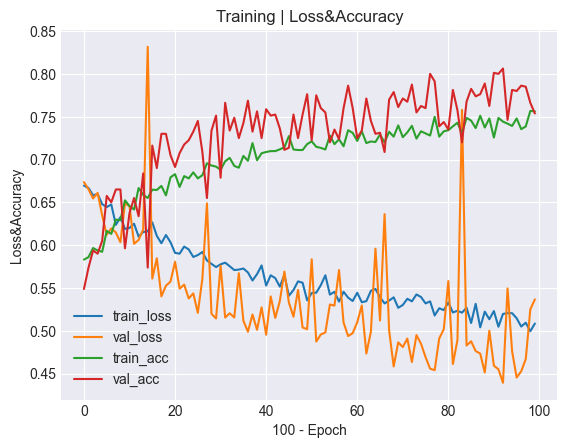

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-darkgrid") #arka temayı ayarlamak görselleştirme
plt.figure()

#grafik çizimi
epochs=100

plt.plot(np.arange(0,epochs), history_x.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history_x.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history_x.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history_x.history["val_acc"], label="val_acc")

plt.title("Training | Loss&Accuracy")
plt.xlabel("100 - Epoch")
plt.ylabel("Loss&Accuracy")
plt.legend(loc="lower left")

yukarıda görüldüğü gibi modelimiz bir çizgiye değere doğru yakınsıyor olması gereken budur

In [29]:
model_x.save("models/cat_dog_last.h5")

# Prediction

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [3]:
model_path = "models/cat_dog_last.h5"
img_path = "Dataset/catdog/test/dogs/1512.jpg"

In [4]:
prediction_model = load_model(model_path)
test_img = load_img(img_path, target_size=(150,150)) #size ı 150 150 ayarlamıştık modelde

<PIL.Image.Image image mode=RGB size=150x150 at 0x2356AAC3970>


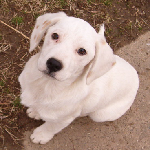

In [5]:
print(test_img)
test_img

In [6]:
test_img = img_to_array(test_img)
test_img.shape

(150, 150, 3)

In [7]:
test_img = np.expand_dims(test_img, axis=0) #4 boyuta çıktık

In [8]:
test_img.shape

(1, 150, 150, 3)

In [9]:
train_generator_x.class_indices #classları veren komut

NameError: name 'train_generator_x' is not defined

In [10]:
result = prediction_model.predict(test_img)
result

1/1 [==============================] - 0s 295ms/step


array([[1.]], dtype=float32)

In [11]:
if result[0][0]>0.5:
    label = "Dog"
    print("This is a:",label)
else:
    label = "Cat"
    print("This is a:",label)

This is a: Dog


In [12]:
import cv2

test_img = cv2.imread(img_path)
font = cv2.FONT_HERSHEY_SIMPLEX
color = (255,255,0)
cv2.putText(test_img, label,(20,40),font,1.0,color,3)

cv2.imshow("Prediction",test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()